In [1]:
# Import the dependencies required for the project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st

In [2]:
# Load the CSV files
city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# read the csv files
city_data_df = pd.read_csv(city_data_to_load)

ride_data_df = pd.read_csv(ride_data_to_load)

print(city_data_df)
print(ride_data_df.head())


                city  driver_count   type
0        Richardfort            38  Urban
1       Williamsstad            59  Urban
2        Port Angela            67  Urban
3         Rodneyfort            34  Urban
4        West Robert            39  Urban
..               ...           ...    ...
115     Bradshawfurt             7  Rural
116     New Ryantown             2  Rural
117   Randallchester             9  Rural
118      Jessicaport             1  Rural
119  South Saramouth             7  Rural

[120 rows x 3 columns]
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344


In [4]:
# Inspect the city data
print(city_data_df.count())

# Verify there are no nulls in the data
print(city_data_df.isnull().sum())

# What is the type of data in the city csv
print(city_data_df.dtypes)

# How many tpyes of cities are there
print(city_data_df["type"].unique())

city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64
city            object
driver_count     int64
type            object
dtype: object
['Urban' 'Suburban' 'Rural']


In [5]:
# How many data points are in urban, rural, and suburban
print(sum(city_data_df['type'] == 'Urban'))
print(sum(city_data_df['type'] == 'Rural'))
print(sum(city_data_df['type'] == 'Suburban'))

66
18
36


In [6]:
# Inspect the ride data
print(ride_data_df.count())

# Any nulls?
print(ride_data_df.isnull().sum())

# Types of data
print(ride_data_df.dtypes)

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [7]:
# Merge the data sets
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# view the new data frame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [8]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [9]:
# Get the number of rides for each city
# Use the groupby function so that you can view the sum of rides for EACH city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']


In [10]:
# Get the average fare for each city
urban_fare = urban_cities_df.groupby(['city']).mean()['fare']

suburban_fare = suburban_cities_df.groupby(['city']).mean()['fare']

rural_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [11]:
# Get the average number of drivers for each city
urban_drivers_count = urban_cities_df.groupby(['city']).mean()['driver_count']

suburban_drivers_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

rural_drivers_count = rural_cities_df.groupby(['city']).mean()['driver_count']

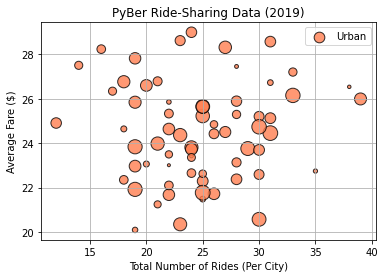

In [12]:
# Plot the urban scatter plot
plt.scatter(urban_ride_count, urban_fare, 
            s=3*urban_drivers_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

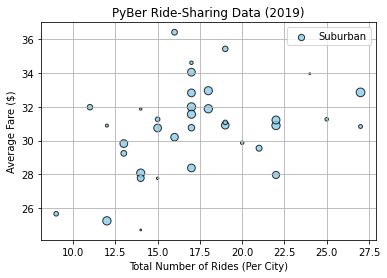

In [13]:
# Plot the suburban scatter plot
plt.scatter(suburban_ride_count, suburban_fare, 
            s=3*suburban_drivers_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

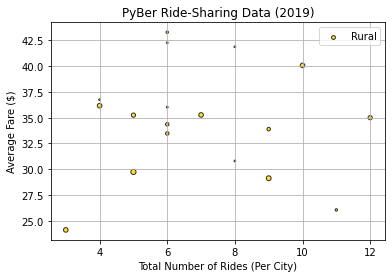

In [14]:
# Creat the rural scatter plot
plt.scatter(rural_ride_count, rural_fare, 
            s=3*rural_drivers_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

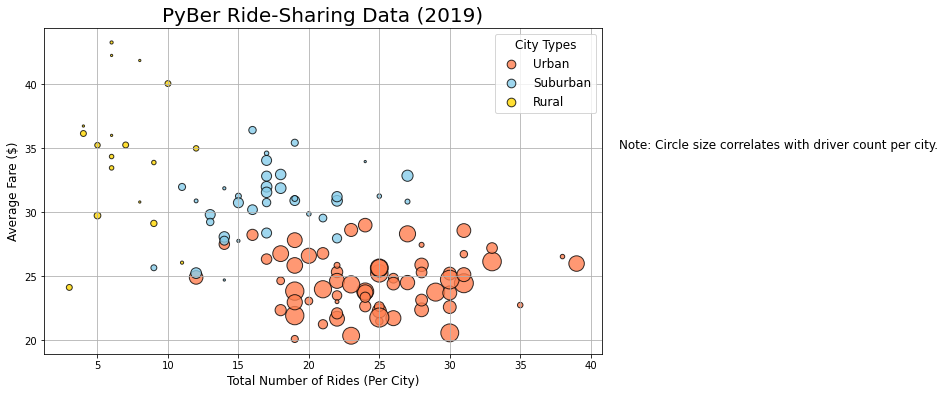

In [15]:
# Combine all of the scatter plots into one
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, urban_fare, 
            s=5*urban_drivers_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

plt.scatter(suburban_ride_count, suburban_fare, 
            s=5*suburban_drivers_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

plt.scatter(rural_ride_count, rural_fare, 
            s=5*rural_drivers_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Plot them
plt.show()

In [16]:
# Use describe on all 3 dataframes
print(urban_cities_df.describe())
print(suburban_cities_df.describe())
print(rural_cities_df.describe())

              fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000
             fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712000
std     10.677508  2.912410e+12      8.042372
min     12.050000  3.218337e+08      1.000000
25%     21.970000  2.364253e+12      5.000000
50%     30.750000  5.053221e+12     16.000000
75%     39.830000  7.551674e+12     21.000000
max     49.960000  9.917744e+12     25.000000
             fare       ride_id  driver_count
count  125.000000  1.250000e+02    125.000000
mean    34.623440  4.647746e+12      4.296000
std     14.558046  2.8878

In [17]:
# Summary Stats
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [18]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [28]:
import scipy.stats as sts

In [29]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [33]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count:.2f}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")


The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.00.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [36]:
# Calculate the measures of central tendency for the ride count for the rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f'The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.')

median_rural_ride_count = np.median(rural_ride_count)
print(f'The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.')

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [42]:
# pull out the fare data from the urban, suburban, and rural cities data frames
urban_fare = urban_cities_df['fare']
suburban_fare = suburban_cities_df['fare']
rural_fare = rural_cities_df['fare']
urban_fare.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [41]:
# Get the mean, median, mode for urban cities fare$
mean_urban_fare = np.mean(urban_fare)
print(f'The mean fare for urban cities is {mean_urban_fare:.2f}.')

median_urban_fare = np.median(urban_fare)
print(f'The median fare for urban cities is {median_urban_fare:.2f}.')

mode_urban_fare = sts.mode(urban_fare)
print(f'The mode fare for urban cities is {mode_urban_fare}.')

The mean fare for urban cities is 24.53.
The median fare for urban cities is 24.64.
The mode fare for urban cities is ModeResult(mode=array([22.86]), count=array([5])).


In [44]:
# Get the mean, median, mode for suburban cities fare$
mean_suburban_fare = np.mean(suburban_fare)
print(f'The mean fare for suburban cities is {mean_suburban_fare:.2f}.')

median_suburban_fare = np.median(suburban_fare)
print(f'The median fare for suburban cities is {median_suburban_fare:.2f}.')

mode_suburban_fare = sts.mode(suburban_fare)
print(f'The mode fare for suburban cities is {mode_suburban_fare}.')

The mean fare for suburban cities is 30.97.
The median fare for suburban cities is 30.75.
The mode fare for suburban cities is ModeResult(mode=array([17.99]), count=array([3])).


In [43]:
# Get the mean, median, mode for rural cities fare$
mean_rural_fare = np.mean(rural_fare)
print(f'The mean fare for rural cities is {mean_rural_fare:.2f}.')

median_rural_fare = np.median(rural_fare)
print(f'The median fare for rural cities is {median_rural_fare:.2f}.')

mode_rural_fare = sts.mode(rural_fare)
print(f'The mode fare for rural cities is {mode_rural_fare}.')

The mean fare for rural cities is 34.62.
The median fare for rural cities is 37.05.
The mode fare for rural cities is ModeResult(mode=array([37.05]), count=array([2])).


In [46]:
# Get the driver data from the urban, suburban, and rural data frames
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [47]:
# Get the mean, median, and mode for the urban cities driver count
mean_urban_drivers = np.mean(urban_drivers)
print(mean_urban_drivers)

median_urban_drivers = np.median(urban_drivers)
print(median_urban_drivers)

mode_urban_drivers = sts.mode(urban_drivers)
print(mode_urban_drivers)

36.67815384615385
37.0
ModeResult(mode=array([39]), count=array([86]))


In [48]:
# Get the mean, median, and mode for the suburban cities driver count
mean_suburban_drivers = np.mean(suburban_drivers)
print(mean_suburban_drivers)

median_suburban_drivers = np.median(suburban_drivers)
print(median_suburban_drivers)

mode_suburban_drivers = sts.mode(suburban_drivers)
print(mode_suburban_drivers)

13.712
16.0
ModeResult(mode=array([20]), count=array([79]))


In [49]:
# Get the mean, median, and mode for the rural cities driver count
mean_rural_drivers = np.mean(rural_drivers)
print(mean_rural_drivers)

median_rural_drivers = np.median(rural_drivers)
print(median_rural_drivers)

mode_rural_drivers = sts.mode(rural_drivers)
print(mode_rural_drivers)

4.296
4.0
ModeResult(mode=array([1]), count=array([32]))


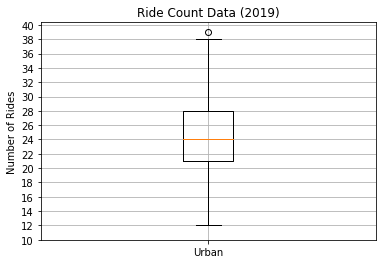

In [50]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

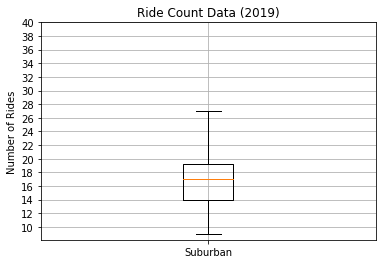

In [51]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

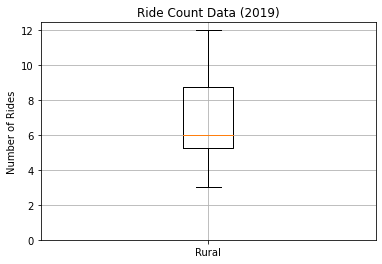

In [54]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 14, step=2.0))
ax.grid()
plt.show()

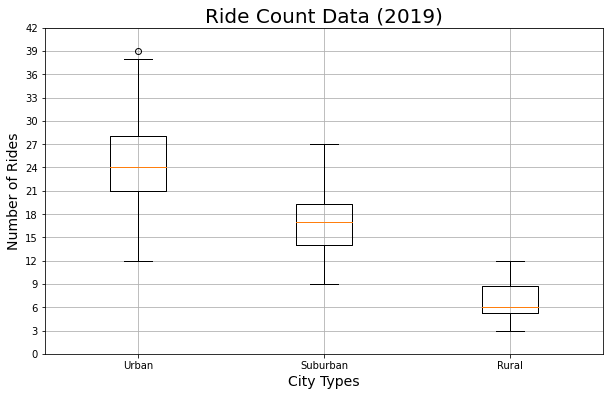

In [56]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Resources/Fig2.png")
plt.show()

In [57]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


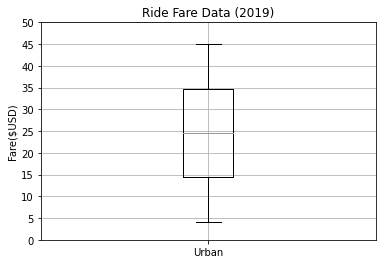

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [60]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fare, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fare.describe()

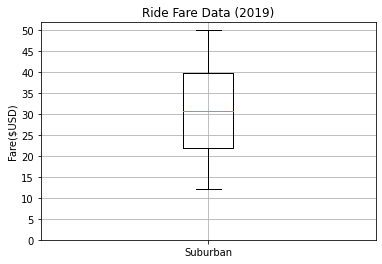

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [61]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fare, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fare.describe()

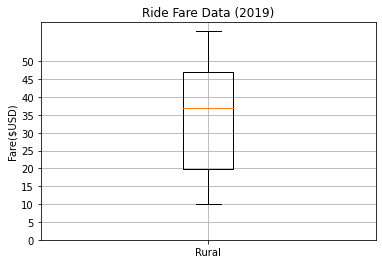

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [62]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fare, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fare.describe()

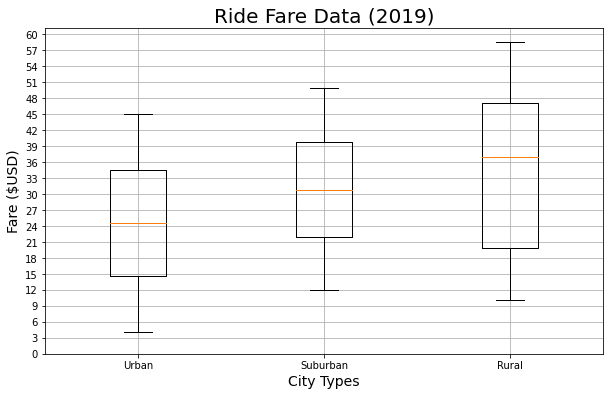

In [68]:
# Add all fare data box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_fare, suburban_fare, rural_fare]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 63, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Resources/Fig3.png")
#print("Urban Summary Statstics     Suburban Summary Statistics     Rural Summary Statistics")
#print(f'{urban_fare.describe()}     {suburban_fare.describe()}     {rural_fare.describe()}')

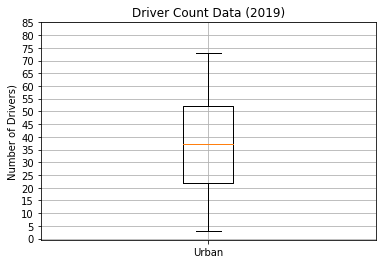

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [69]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

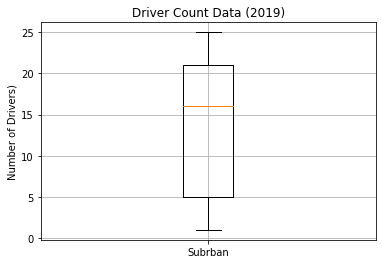

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [71]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

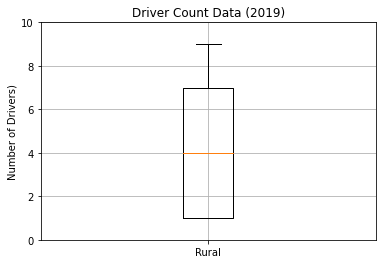

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [73]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 12, step=2))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

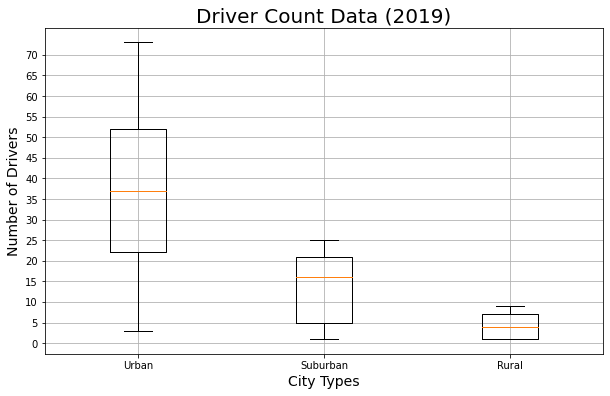

In [74]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()